In [ ]:
%load_ext autoreload

In [ ]:
import sys
sys.path.append('../')

In [ ]:
%autoreload

import sys
import os

sys.path.append('../')

from utilities import create_data as create

home_dir = os.path.join(os.path.expanduser('~'), 'Documents/TDT4173-ML')
saved_data_path = os.path.join(home_dir, 'data_processed')

In [ ]:
data_nan = create.CreateTrainingData()

train_nan = data.create_training_data(use_mean_values=True)

# Keep only 'cloud_base_agl:m' and 'ceiling_height_agl:m' as features in train
train_nan = train_nan[['cloud_base_agl:m', 'ceiling_height_agl:m']]

# Print number of rows with nans
print('Number of rows with nans: {}'.format(train_nan.isna().sum().sum()))

In [ ]:
data = create.CreateTrainingData()

train = data.create_training_data(use_mean_values=True)

# Keep only 'cloud_base_agl:m' and 'ceiling_height_agl:m' as features in train
train = train[['cloud_base_agl:m', 'ceiling_height_agl:m']]

# Print number of rows with nans
print('Number of rows with nans: {}'.format(train.isna().sum().sum()))

In [ ]:
# Rename columns in train_nan and train to not contain ':m'
train_nan.columns = ['cloud_base_agl', 'ceiling_height_agl']
train.columns = ['cloud_base_agl', 'ceiling_height_agl'] 

In [ ]:
# Use sklearn to impute missing values in train
import numpy as np
from sklearn.impute import KNNImputer

# Create imputer
imputer = KNNImputer(n_neighbors=2, weights='uniform', metric='nan_euclidean')

# Fit imputer to train
imputer.fit(train)

# Transform train
train = imputer.transform(train)

In [39]:
# Print number of rows with nans in train
print('Number of rows with nans: {}'.format(np.isnan(train).sum().sum()))

Number of rows with nans: 0


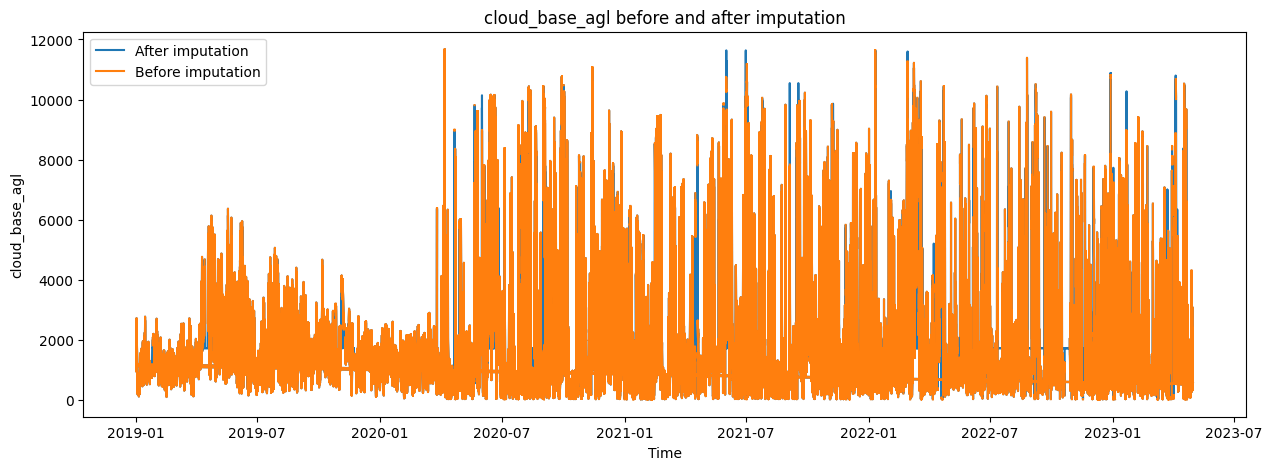

In [38]:
# Plot cloud_base_agl before imputation against cloud_base_agl after imputation. Use line plot and
# x axis as time and y axis as cloud_base_agl. Use different colors for the two lines.
import matplotlib.pyplot as plt

# Create figure
fig, ax = plt.subplots(figsize=(15, 5))

# Plot cloud_base_agl after imputation
ax.plot(train_nan.index, train[:, 0], label='After imputation')

# Plot cloud_base_agl before imputation
ax.plot(train_nan.index, train_nan.cloud_base_agl, label='Before imputation')



# Set title and labels
ax.set_title('cloud_base_agl before and after imputation')
ax.set_xlabel('Time')
ax.set_ylabel('cloud_base_agl')

# Set legend
ax.legend()

# Show plot
plt.show()